In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [32]:
df = pd.read_csv('../input/train.csv')
data = df.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
home_features = ['OverallQual','OverallCond','YearBuilt','TotalBsmtSF','1stFlrSF', 'GrLivArea', 
'FullBath', 'TotRmsAbvGrd','GarageCars', 'GarageArea','Fireplaces', 'LotArea','YearRemodAdd','SalePrice']

In [35]:
df_req = df[home_features]
df_req.head()

,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,LotArea,YearRemodAdd,SalePrice
0,7,5,2003,856,856,1710,2,8,2,548,0,8450,2003,208500
1,6,8,1976,1262,1262,1262,2,6,2,460,1,9600,1976,181500
2,7,5,2001,920,920,1786,2,6,2,608,1,11250,2002,223500
3,7,5,1915,756,961,1717,1,7,3,642,1,9550,1970,140000
4,8,5,2000,1145,1145,2198,2,9,3,836,1,14260,2000,250000


In [36]:
df_req.dtypes

OverallQual     int64
OverallCond     int64
YearBuilt       int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
Fireplaces      int64
LotArea         int64
YearRemodAdd    int64
SalePrice       int64
dtype: object

In [37]:
correlations = df_req.corr()['SalePrice']
X = df_req.drop(columns='SalePrice')
y = df['SalePrice']
X.head()

,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,LotArea,YearRemodAdd
0,7,5,2003,856,856,1710,2,8,2,548,0,8450,2003
1,6,8,1976,1262,1262,1262,2,6,2,460,1,9600,1976
2,7,5,2001,920,920,1786,2,6,2,608,1,11250,2002
3,7,5,1915,756,961,1717,1,7,3,642,1,9550,1970
4,8,5,2000,1145,1145,2198,2,9,3,836,1,14260,2000


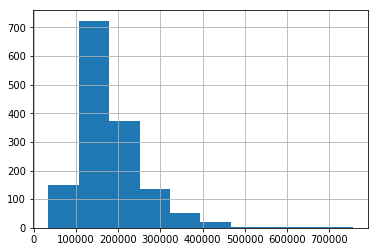

In [38]:
y.hist();

It seems like the data is skewed to the right, that is there are a few houses with extra-ordinarily high prices. For linear regression techniques, symmetric data is more conducive to work with, so we take a log transform of the target variable and then plot its distribution.



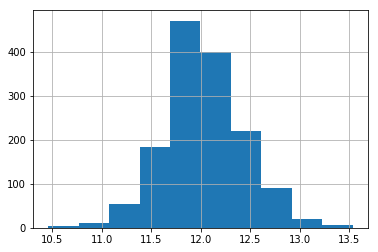

In [39]:
import numpy as np
y_copy = y
y = np.log1p(y)
y.hist();

Now, the target variable y is more symmetrically distributed (It is closer to normal (or guassian) distribution also known as the bell curve.

In [69]:
# let's train our first model....Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.275,random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print('R-squared score (training): {:.3f}'.format(lin_reg.score(X_train, y_train)))
print('R-squared score (validation): {:.3f}'.format(lin_reg.score(X_valid, y_valid)))
LINREG = lin_reg.score(X_valid, y_valid)
LINREG_TRAIN = lin_reg.score(X_train, y_train)


R-squared score (training): 0.840
R-squared score (validation): 0.870


In [71]:
# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_Poly = poly.fit_transform(X)
X_poly_train,X_poly_valid,y_poly_train,y_poly_valid = train_test_split(X_Poly,y,test_size=0.275,random_state=42)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly_train, y_poly_train)
print('R-squared score (training): {:.3f}'.format(poly_lin_reg.score(X_poly_train, y_poly_train)))
print('R-squared score (validation): {:.3f}'.format(poly_lin_reg.score(X_poly_valid, y_poly_valid)))

POLLINREG = poly_lin_reg.score(X_poly_valid, y_poly_valid)
POLLINREG_TRAIN = poly_lin_reg.score(X_poly_train, y_poly_train)

R-squared score (training): 0.908
R-squared score (validation): 0.862


In [72]:
# let's try for degree 3 :

from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree = 3)
X_Poly3 = poly3.fit_transform(X)
X_poly3_train,X_poly3_valid,y_poly3_train,y_poly3_valid = train_test_split(X_Poly3,y,test_size=0.275,random_state=42)

poly3_lin_reg = LinearRegression()
poly3_lin_reg.fit(X_poly3_train, y_poly3_train)
print('R-squared score (training): {:.3f}'.format(poly3_lin_reg.score(X_poly3_train, y_poly3_train)))
print('R-squared score (validation): {:.3f}'.format(poly3_lin_reg.score(X_poly3_valid, y_poly3_valid)))

POLL3INREG = poly3_lin_reg.score(X_poly3_valid, y_poly3_valid)
POLL3INREG_TRAIN = poly3_lin_reg.score(X_poly3_train, y_poly3_train)

R-squared score (training): 0.932
R-squared score (validation): -0.659


In [88]:
from sklearn.linear_model import Lasso

poly_lasso = Lasso(alpha=10)
poly_lasso.fit(X_poly_train, y_poly_train)

print('R-squared score (training): {:.3f}'.format(poly_lasso.score(X_poly_train, y_poly_train)))
print('R-squared score (validation): {:.3f}'.format(poly_lasso.score(X_poly_valid, y_poly_valid)))

LASREG = poly_lasso.score(X_poly_valid, y_poly_valid)
LASREG_TRAIN = poly_lasso.score(X_poly_train, y_poly_train)

R-squared score (training): 0.890
R-squared score (validation): 0.884


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [102]:
from sklearn.linear_model import Ridge

poly_ridge = Ridge(alpha=300)
poly_ridge.fit(X_poly_train, y_poly_train)

print('R-squared score (training): {:.3f}'.format(poly_ridge.score(X_poly_train, y_poly_train)))
print('R-squared score (validation): {:.3f}'.format(poly_ridge.score(X_poly_valid, y_poly_valid)))

RIDREG = poly_ridge.score(X_poly_valid, y_poly_valid)
RIDREG_TRAIN = poly_ridge.score(X_poly_train, y_poly_train)

R-squared score (training): 0.904
R-squared score (validation): 0.876


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.505104e-20
  overwrite_a=True).T


In [103]:
Models = pd.DataFrame({'Models' : ['Linear Regression','Linear Regression With polynomial(degree=2)','Linear Regression With polynomial(degree=3)'
                                   ,'Lasso','Ridge'],
                       'Training Score' : [LINREG_TRAIN,POLLINREG_TRAIN,POLL3INREG_TRAIN,LASREG_TRAIN,RIDREG_TRAIN],
                       'Validation Score' : [LINREG,POLLINREG,POLL3INREG,LASREG,RIDREG]
                      })
Models

,Models,Training Score,Validation Score
0,Linear Regression,0.839971,0.870211
1,Linear Regression With polynomial(degree=2),0.907512,0.861982
2,Linear Regression With polynomial(degree=3),0.931765,-0.658879
3,Lasso,0.890028,0.883611
4,Ridge,0.903617,0.876334


In [122]:
df_test = pd.read_csv('../input/test.csv')
ID = df_test['Id']
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [123]:
test_home_features =['OverallQual','OverallCond','YearBuilt','TotalBsmtSF','1stFlrSF', 'GrLivArea', 
'FullBath', 'TotRmsAbvGrd','GarageCars', 'GarageArea','Fireplaces', 'LotArea','YearRemodAdd']
X_test = df_test[test_home_features]
X_test.head()

,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,LotArea,YearRemodAdd
0,5,6,1961,882.0,896,896,1,5,1.0,730.0,0,11622,1961
1,6,6,1958,1329.0,1329,1329,1,6,1.0,312.0,0,14267,1958
2,5,5,1997,928.0,928,1629,2,6,2.0,482.0,1,13830,1998
3,6,6,1998,926.0,926,1604,2,7,2.0,470.0,1,9978,1998
4,8,5,1992,1280.0,1280,1280,2,5,2.0,506.0,0,5005,1992


In [124]:
X_test = X_test.fillna(method='ffill')

In [125]:
test_lasso_reg = Lasso(alpha=10).fit(X_Poly,y)
X_test_Poly = poly.fit_transform(X_test)
predictions  = test_lasso_reg.predict(X_test_Poly)
predictions[:10]

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([11.73426789, 11.94958633, 12.06803169, 12.16687311, 12.13009622,
       12.06752604, 12.08312071, 12.00819322, 12.17048291, 11.60669951])

In [126]:
predictions = np.expm1(predictions) 
predictions[:10]

array([124774.06131349, 154752.11592666, 174211.60252011, 192310.76415935,
       185366.6105324 , 174123.53571647, 176860.23294836, 164092.75413432,
       193006.22557957, 109830.15488718])

In [127]:
submissions = pd.DataFrame({'Id': ID,'SalePrice':predictions})
submissions.head()

,Id,SalePrice
0,1461,124774.061313
1,1462,154752.115927
2,1463,174211.602520
3,1464,192310.764159
4,1465,185366.610532


In [130]:
submissions.to_csv('my_submission.csv', index=False)